In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D


In [ ]:
images = pathlib.Path('/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona')

In [ ]:
img_height=360
img_width=360
train_data = tf.keras.preprocessing.image_dataset_from_directory(
                                            images, validation_split=0.2, subset='training', seed=123,
                                            image_size=(img_height, img_width))

Found 17092 files belonging to 8 classes.
Using 13674 files for training.


In [ ]:
val_data= tf.keras.preprocessing.image_dataset_from_directory(images,
                                          validation_split=0.2,
                                          subset='validation',
                                         seed=123,
                                         image_size=(360,360))

Found 17092 files belonging to 8 classes.
Using 3418 files for validation.


In [ ]:
num_classes=8

model = Sequential([
    
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.4),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 360, 360, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 360, 360, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 180, 180, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 64)        0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, 
                    validation_data=val_data, 
                    epochs=15)

Epoch 1/15


/home/benjamin/anaconda3/envs/gpu2/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


428/428 [==============================] - 392s 915ms/step - loss: 0.9970 - accuracy: 0.6436 - val_loss: 0.4212 - val_accuracy: 0.8628
Epoch 2/15
428/428 [==============================] - 393s 918ms/step - loss: 0.3356 - accuracy: 0.8849 - val_loss: 0.3221 - val_accuracy: 0.8877
Epoch 3/15
428/428 [==============================] - 387s 904ms/step - loss: 0.2217 - accuracy: 0.9225 - val_loss: 0.2465 - val_accuracy: 0.9154
Epoch 4/15
428/428 [==============================] - 388s 908ms/step - loss: 0.1695 - accuracy: 0.9424 - val_loss: 0.2391 - val_accuracy: 0.9231
Epoch 5/15
428/428 [==============================] - 389s 908ms/step - loss: 0.1357 - accuracy: 0.9533 - val_loss: 0.2647 - val_accuracy: 0.9163
Epoch 6/15
428/428 [==============================] - 388s 907ms/step - loss: 0.1066 - accuracy: 0.9647 - val_loss: 0.2648 - val_accuracy: 0.9251
Epoch 7/15
428/428 [==============================] - 388s 907ms/step - loss: 0.0938 - accuracy: 0.9685 - val_loss: 0.2371 - val_accura

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

images = pathlib.Path('/content/drive/MyDrive/Kaggle/Tests/TestA')
test_data = image_dataset_from_directory(images,
                                        subset=None,
                                         seed=123,
                                         image_size=(360,360))

Found 4350 files belonging to 8 classes.


In [ ]:
y_true = np.concatenate([y for x,y in test_data_norm])

In [ ]:
y_pred = model.predict(test_data_norm)

In [ ]:
y_pred_class = y_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.00      0.00      0.00       322
           2       0.00      0.00      0.00         4
           3       0.24      0.97      0.38      1034
           4       0.00      0.00      0.00       234
           5       0.00      0.00      0.00      2660
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3

    accuracy                           0.23      4350
   macro avg       0.03      0.12      0.05      4350
weighted avg       0.06      0.23      0.09      4350



/home/benjamin/anaconda3/envs/gpu2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/benjamin/anaconda3/envs/gpu2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/benjamin/anaconda3/envs/gpu2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

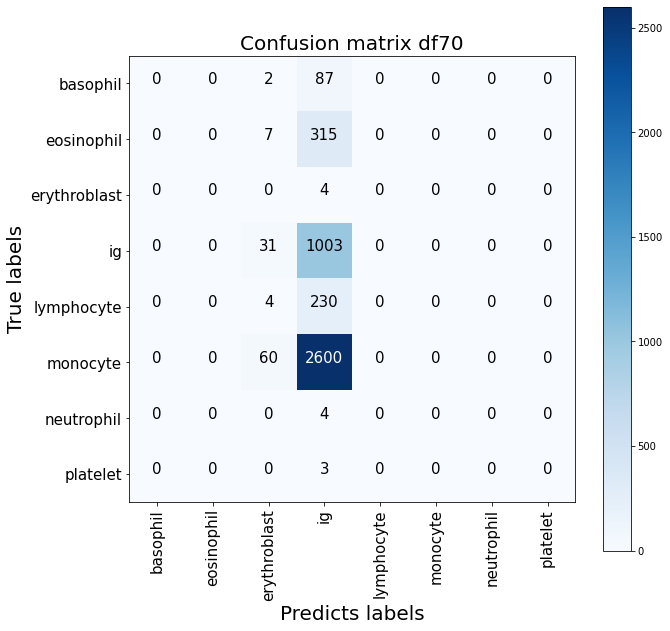

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

cnf_matrix = confusion_matrix(y_true, y_pred_class)

classes = train_data.class_names

plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70",fontsize=20)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation =90,fontsize=15)
plt.yticks(tick_marks, classes,fontsize=15)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black",
            fontsize=15)

plt.ylabel('True labels',fontsize=20)
plt.xlabel('Predicts labels',fontsize=20)
plt.show()

In [ ]:
model.evaluate(test_data)

136/136 [==============================] - 25s 182ms/step - loss: 66.5211 - accuracy: 0.0768


[66.52108001708984, 0.07678160816431046]

# EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB1

efficientNet = EfficientNetB1(include_top=False, input_shape=(img_height, img_width, 3))

for layer in efficientNet.layers:
    layer.trainable = False
    
efficientNet.summary()

27033600/27018416 [==============================] - 1s 0us/step
Model: "efficientnetb1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 360, 360, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 360, 360, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 360, 360, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 361, 361, 3)  0           normalization[0][0]              
____________________

block4b_bn (BatchNormalization) (None, 23, 23, 480)  1920        block4b_dwconv[0][0]             
__________________________________________________________________________________________________
block4b_activation (Activation) (None, 23, 23, 480)  0           block4b_bn[0][0]                 
__________________________________________________________________________________________________
block4b_se_squeeze (GlobalAvera (None, 480)          0           block4b_activation[0][0]         
__________________________________________________________________________________________________
block4b_se_reshape (Reshape)    (None, 1, 1, 480)    0           block4b_se_squeeze[0][0]         
__________________________________________________________________________________________________
block4b_se_reduce (Conv2D)      (None, 1, 1, 20)     9620        block4b_se_reshape[0][0]         
__________________________________________________________________________________________________
block4b_se

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential()

model.add(efficientNet)

model.add(GlobalAveragePooling2D())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb1 (Functional)  (None, 12, 12, 1280)      6575239   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1311744   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [ ]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
                    validation_data=val_data, 
                    epochs=5)

Epoch 1/5


/home/benjamin/anaconda3/envs/gpu2/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


428/428 [==============================] - 950s 2s/step - loss: 0.7138 - accuracy: 0.7476 - val_loss: 0.3743 - val_accuracy: 0.8692
Epoch 2/5
428/428 [==============================] - 943s 2s/step - loss: 0.4011 - accuracy: 0.8606 - val_loss: 0.2742 - val_accuracy: 0.8988
Epoch 3/5
428/428 [==============================] - 962s 2s/step - loss: 0.3435 - accuracy: 0.8803 - val_loss: 0.2395 - val_accuracy: 0.9169
Epoch 4/5
428/428 [==============================] - 959s 2s/step - loss: 0.2876 - accuracy: 0.9005 - val_loss: 0.2367 - val_accuracy: 0.9143
Epoch 5/5
428/428 [==============================] - 948s 2s/step - loss: 0.2719 - accuracy: 0.9079 - val_loss: 0.2050 - val_accuracy: 0.9333


In [ ]:
model.evaluate(test_data)

136/136 [==============================] - 237s 2s/step - loss: 7.3087 - accuracy: 6.8966e-04


[7.308748722076416, 0.0006896551931276917]

In [ ]:
y_pred_class.shape

(4350,)

In [ ]:
y_true_test.shape

(4350,)

In [ ]:
for layer in efficientNet.layers[-4:]:
    layer.trainable = True

In [ ]:
history_defreeze_4 = model.fit(train_data,
                    validation_data=val_data, 
                    epochs=5)

Epoch 1/5
428/428 [==============================] - 964s 2s/step - loss: 0.2691 - accuracy: 0.9061 - val_loss: 0.2571 - val_accuracy: 0.9122
Epoch 2/5
428/428 [==============================] - 967s 2s/step - loss: 0.2634 - accuracy: 0.9087 - val_loss: 0.1794 - val_accuracy: 0.9424
Epoch 3/5
428/428 [==============================] - 961s 2s/step - loss: 0.2346 - accuracy: 0.9204 - val_loss: 0.2072 - val_accuracy: 0.9283
Epoch 4/5
428/428 [==============================] - 956s 2s/step - loss: 0.2265 - accuracy: 0.9199 - val_loss: 0.2107 - val_accuracy: 0.9286
Epoch 5/5
428/428 [==============================] - 972s 2s/step - loss: 0.2160 - accuracy: 0.9253 - val_loss: 0.2001 - val_accuracy: 0.9359


In [ ]:
model.evaluate(test_data)

136/136 [==============================] - 242s 2s/step - loss: 8.5680 - accuracy: 0.0156


[8.568001747131348, 0.015632184222340584]

In [ ]:
y_true_test = np.concatenate([y for x,y in test_data])

In [ ]:
y_pred = model.predict(test_data)
y_pred_class = y_pred.argmax(axis=1)

In [ ]:
print(classification_report(y_true_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.03      0.01      0.02        89
           1       0.07      0.01      0.02       322
           2       0.00      0.50      0.00         4
           3       0.17      0.01      0.02      1034
           4       0.01      0.00      0.01       234
           5       0.50      0.00      0.01      2660
           6       0.00      0.75      0.00         4
           7       0.00      0.33      0.00         3

    accuracy                           0.01      4350
   macro avg       0.10      0.20      0.01      4350
weighted avg       0.35      0.01      0.01      4350



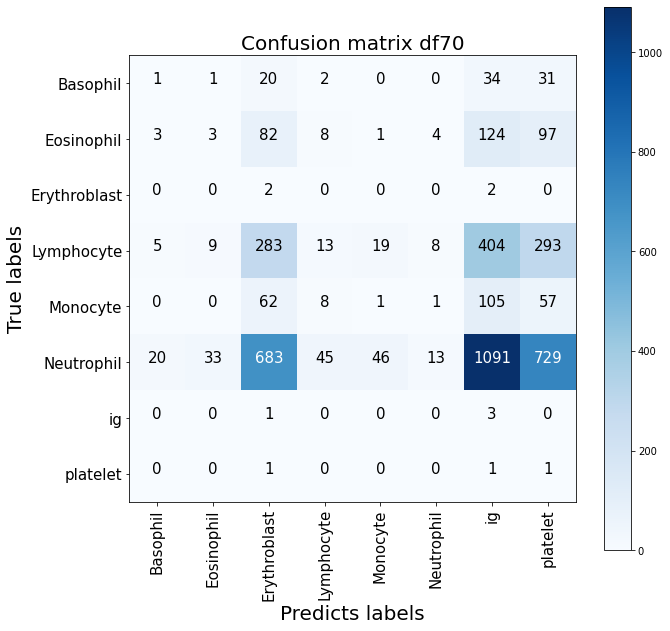

In [ ]:
cnf_matrix = confusion_matrix(y_true_test, y_pred_class)

classes = test_data.class_names

plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70",fontsize=20)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation =90,fontsize=15)
plt.yticks(tick_marks, classes,fontsize=15)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black",
            fontsize=15)

plt.ylabel('True labels',fontsize=20)
plt.xlabel('Predicts labels',fontsize=20)
plt.show()

# VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

n_class = 8

base_model = VGG16(weights='imagenet', include_top=False) 

for layer in base_model.layers: 
    layer.trainable = False

loaded_model = Sequential()
loaded_model.add(base_model)
loaded_model.add(GlobalAveragePooling2D()) 
loaded_model.add(Dense(1024, activation='relu'))
loaded_model.add(Dropout(rate=0.2))
loaded_model.add(Dense(512, activation='relu'))
loaded_model.add(Dropout(rate=0.2))
loaded_model.add(Dense(n_class, activation='softmax'))

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 4

In [ ]:
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = loaded_model.fit(train_data, 
                           epochs=5,
                           validation_data=val_data)

Epoch 1/5
428/428 [==============================] - 2275s 5s/step - loss: 1.0337 - acc: 0.6780 - val_loss: 0.4871 - val_acc: 0.8414
Epoch 2/5
226/428 [==============>...............] - ETA: 14:18 - loss: 0.4952 - acc: 0.8277

In [ ]:
model.evaluate(test_data)

In [ ]:
y_true_test = np.concatenate([y for x,y in test_data])

In [ ]:
y_pred = model.predict(test_data)
y_pred_class = y_pred.argmax(axis=1)

In [ ]:
print(classification_report(y_true_test, y_pred_class))

In [ ]:
cnf_matrix = confusion_matrix(y_true_test, y_pred_class)

classes = test_data.class_names

plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70",fontsize=20)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation =90,fontsize=15)
plt.yticks(tick_marks, classes,fontsize=15)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black",
            fontsize=15)

plt.ylabel('True labels',fontsize=20)
plt.xlabel('Predicts labels',fontsize=20)
plt.show()